<h1><font color="#113D68" size=5>Proyecto de Consolidación VII</font></h1>



<h1><font color="#113D68" size=6>Resolución de un problema de clasificación con Deep Learning</font></h1>


<br><br>
<div style="text-align: right">
  <font color="#113D68" size=3>Fernando Rubio</font><br>
  <font color="#113D68" size=3>MBIT School</font>
</div>

<div style="text-align: center">
<h1><font color="black" size=8>PROYECTO DE CONSOLIDACIÓN</font></h1>

<div style="text-align: left">
<h1><font color="#009D7F" size=5>Alejandro Santiago Bitria</font></h1>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Índice</font></h2>

1. [Introducción](#section1)
2. [Dataset](#section2)
3. [Modelos desde cero](#section3)
4. [Ajuste de hiperparámetros](#section4)
5. [Modelos pre-entrenados](#section5)
6. [Data Augmentation](#section6)
7. [Resultados y conclusiones](#section7)


---

<a id="section1"></a>
## <font color="#004D7F"> 1. Introducción</font>

<br>

El objetivo del proyecto de consolidación es avanzar, a través de acciones por parte del alumno, en el uso de Deep Learning para la resolución de un problema específico, en este caso, la clasificación de imágenes. 

Para su resolución, se presentará un conjunto de imágenes a las cuales será necesario asignar la clase más probable de entre un conjunto determinado de opciones. Este conjunto de clases será lo suficientemente específico para que no exista una aplicación directa de ninguno de los modelos ya entrenados. 

En este *notebook* os daremos una serie de pasos que hay que realizar para resolver el problema de clasificación y que os servirán de guía para completar el proyecto:

1. Descarga y previsualización de los datos.
2. Creación de una red neuronal desde cero.
3. Mejora de los modelos obtenidos mediante el ajuste de hiperparámetros.
4. Uso de técnicas de *Transfer Learning* sobre modelos pre-entrenados.
5. Uso de *data augmentation* en el dataset.
6. Resultados obtenidos entre las diferentes redes utilizadas y conclusiones a partir de estos resultados.

Conforme se avance por los diferentes apartados, el alumno deberá seleccionar qué modelos o técnicas son los que mejor rendimiento obtienen ya que los resultados de las diferentes secciones dependen de las decisiones tomadas en los apartados anteriores. 

Por estos motivos, será necesario evaluar los modelos obtenidos en terminos de tasa de aciertos y la matriz de confusión de las clases, así como aquellas otras métricas que el alumno considere interesante, y justificar las decisiones tomadas en cada sección. 

Por otro lado, también se tendrá en cuenta el uso de herramientas como los callbacks para realizar procesos de Early Stopping o Checkpoints, así como la herramienta *TensorBoard*.

<a id="section1.1"></a>
### <font color="#004D7F">Entregable</font>

En este trabajo el alumno deberá entregar un cuaderno de *Jupyter* (se puede utilizar este mismo como modelo), donde se haya llevado a cabo cada uno de los pasos.

La entrega deberá incorporar, cuando existan, aquellos ficheros de código necesarios para la ejecución del *notebook*, así como también los ficheros generados mediante otras herramientas como *TensorBoard*.

In [1]:
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tensorflow as tf

import seaborn as sns
import sklearn.metrics as metrics
import sklearn.metrics as confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split

---

<a id="section2"></a>
## <font color="#004D7F"> 2. Dataset</font>


El dataset utilizado está compuesto por imágenes de distintas razas de perro. El dataset contiene 12.891 imágenes con 74 razas, por lo tanto, el objetivo será crear y entrenar un módelo que clasifique la raza de un perro a partir de una imagen. Para descargar el dataset ejecuta la siguiente celda:



In [2]:
!wget 'https://pruebasaluuclm-my.sharepoint.com/:u:/g/personal/fernando_rubio_uclm_es/ESpljekZA9dAgxsfc3qIDvEBMT76g8rPDOpMwgDwHe0BKw?download=1'
!mv 'ESpljekZA9dAgxsfc3qIDvEBMT76g8rPDOpMwgDwHe0BKw?download=1' dog-images.zip
!unzip -q dog-images.zip

--2022-07-22 15:13:46--  https://pruebasaluuclm-my.sharepoint.com/:u:/g/personal/fernando_rubio_uclm_es/ESpljekZA9dAgxsfc3qIDvEBMT76g8rPDOpMwgDwHe0BKw?download=1
Resolving pruebasaluuclm-my.sharepoint.com (pruebasaluuclm-my.sharepoint.com)... 13.107.136.9, 13.107.138.9
Connecting to pruebasaluuclm-my.sharepoint.com (pruebasaluuclm-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/fernando_rubio_uclm_es/Documents/dog-dataset.zip?ga=1 [following]
--2022-07-22 15:13:47--  https://pruebasaluuclm-my.sharepoint.com/personal/fernando_rubio_uclm_es/Documents/dog-dataset.zip?ga=1
Reusing existing connection to pruebasaluuclm-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 498626796 (476M) [application/x-zip-compressed]
Saving to: ‘ESpljekZA9dAgxsfc3qIDvEBMT76g8rPDOpMwgDwHe0BKw?download=1’

ESpljekZA9dAgxsfc3q 100%[===================>] 475.53M   103MB/s    in 5.8s    

2022-07-22 15:13:53 (82.7 

Se descargará un archivo `dog-images.zip` que se descomprimirá automáticamente creando la carpeta `dog-dataset` que contiene el dataset completo. En el interior de esta carpeta encontraréis otra carpeta, `dog-images`, que contiene todas las imágenes del dataset. Las imágenes están distribuidas por carpetas según las disintas razas (74 carpetas en total). El nombre de cada carpeta corresponde con la raza.

A continuación se muestran varias imágenes del dataset.

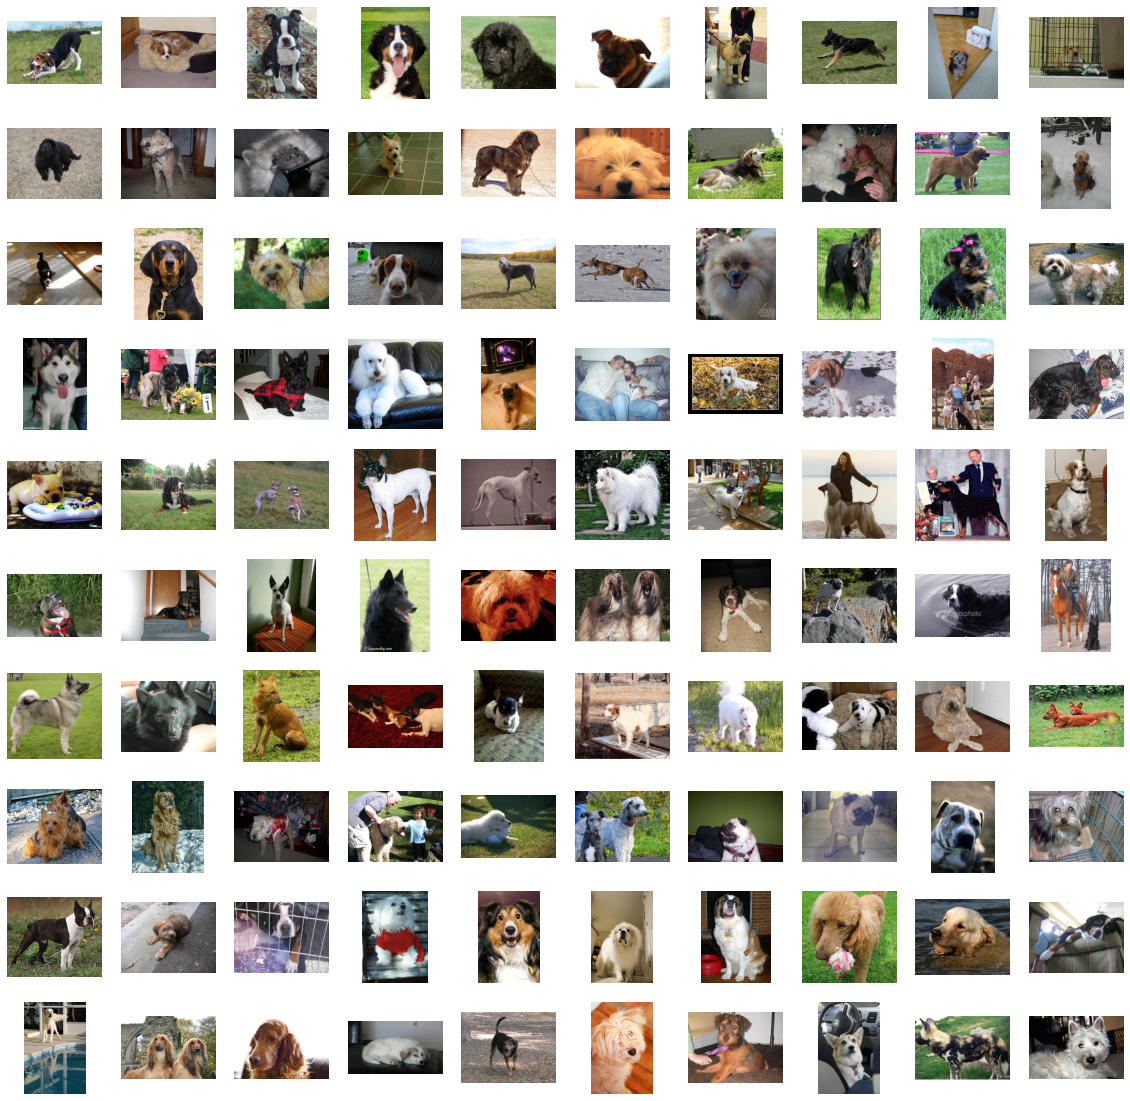

In [3]:
def show_images(img_paths):
    fig=plt.figure(figsize=(20, 20))
    index = np.random.randint(len(img_paths), size=100)
    for i in range(100):
        fig.add_subplot(10, 10, i+1)
        plt.axis('off')
        img = tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(img_paths[index[i]]))/255
        plt.imshow(img)
    plt.show()
    
files = [f for f in glob.glob("dog-dataset/dog-images/**/*.jpg", recursive=True)]
show_images(files)

Vamos a preparar un poco los datos a partir de las imágenes en dog-dataset. 

Primero crearemos una lista (`classes`) con el nombre de las razas de los perros en las que clasificarán los modelos que creemos:

In [4]:
classes = [f.split('/')[-1] for f in glob.glob("dog-dataset/dog-images/**")]

In [5]:
classes

['clumber',
 'Blenheim_spaniel',
 'groenendael',
 'Cardigan',
 'Sealyham_terrier',
 'Pekinese',
 'Welsh_springer_spaniel',
 'Lakeland_terrier',
 'komondor',
 'West_Highland_white_terrier',
 'Boston_bull',
 'African_hunting_dog',
 'Norwegian_elkhound',
 'schipperke',
 'Irish_setter',
 'pug',
 'keeshond',
 'Australian_terrier',
 'Greater_Swiss_Mountain_dog',
 'malamute',
 'German_shepherd',
 'Doberman',
 'Old_English_sheepdog',
 'Walker_hound',
 'Yorkshire_terrier',
 'Irish_water_spaniel',
 'Maltese_dog',
 'French_bulldog',
 'miniature_poodle',
 'beagle',
 'American_Staffordshire_terrier',
 'Great_Pyrenees',
 'golden_retriever',
 'Irish_wolfhound',
 'Scottish_deerhound',
 'Afghan_hound',
 'Japanese_spaniel',
 'bloodhound',
 'toy_terrier',
 'borzoi',
 'Tibetan_mastiff',
 'chow',
 'whippet',
 'dhole',
 'Saint_Bernard',
 'Sussex_spaniel',
 'Shetland_sheepdog',
 'Dandie_Dinmont',
 'Irish_terrier',
 'standard_poodle',
 'English_springer',
 'Pembroke',
 'Rottweiler',
 'Gordon_setter',
 'Newfou

In [6]:
# estos dos diccionarios auxiliares nos permitiran cambiar entre el string y el indice de la clase
num_to_label = {i: c for i, c in enumerate(classes)}
label_to_num = {c: i for i, c in enumerate(classes)}

In [7]:
num_to_label[41]

'chow'

Ahora vamos a generar una lista con los paths y otra lista con los labels correspondientes de cada imagen.

In [8]:
image_paths = np.array([f for f in glob.glob("dog-dataset/dog-images/**/*.jpg", recursive=True)])
image_labels =  np.array([label_to_num[f.split('/')[-2]] for f in glob.glob("dog-dataset/dog-images/**/*.jpg", recursive=True)])

Por último, vamos a crear nuestras particiones de entrenamiento, validación y test.

In [9]:
shuffler = np.random.permutation(len(image_paths))
image_paths = image_paths[shuffler]
image_labels = image_labels[shuffler]

# Train/valid/test split
x_train_valid, x_test, y_train_valid, y_test = train_test_split(image_paths, image_labels, test_size=0.1, random_state=1234, stratify=image_labels)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_valid, y_train_valid, test_size=0.2, random_state=5678, stratify=y_train_valid)

del x_train_valid, y_train_valid

In [ ]:
print(x_train[0:3])
print(y_train[0:3])

<a id="section2.1"></a>
### <font color="#004D7F">Funciones auxiliares</font>

También se proporcionan un par de funciones para la visualización, en concreto una para mostrar las curvas de loss y accuracy a partir del `history` y otra para la matriz de confusión de las clases.

In [10]:
def history_graph(history):
    # Visualizamos la evolución de los epochs
    fig=plt.figure(figsize=(60, 40))

    # error
    fig.add_subplot(10, 10, 2)
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.legend()

    # precision
    fig.add_subplot(10, 10, 1)
    plt.plot(history.history['accuracy'], label='acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.legend()

    plt.show()

def conf_matrix(y_true, y_pred):
    confusion_matrix = metrics.confusion_matrix(y_true=y_true, y_pred=y_pred)

    df_cm=pd.DataFrame(confusion_matrix, index = [i for  i in classes], columns = [i for i in classes])
    plt.figure(figsize = (20,20))
    sns.heatmap(df_cm, annot=True)

In [11]:
y_pred = np.zeros(y_test.shape[0])
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

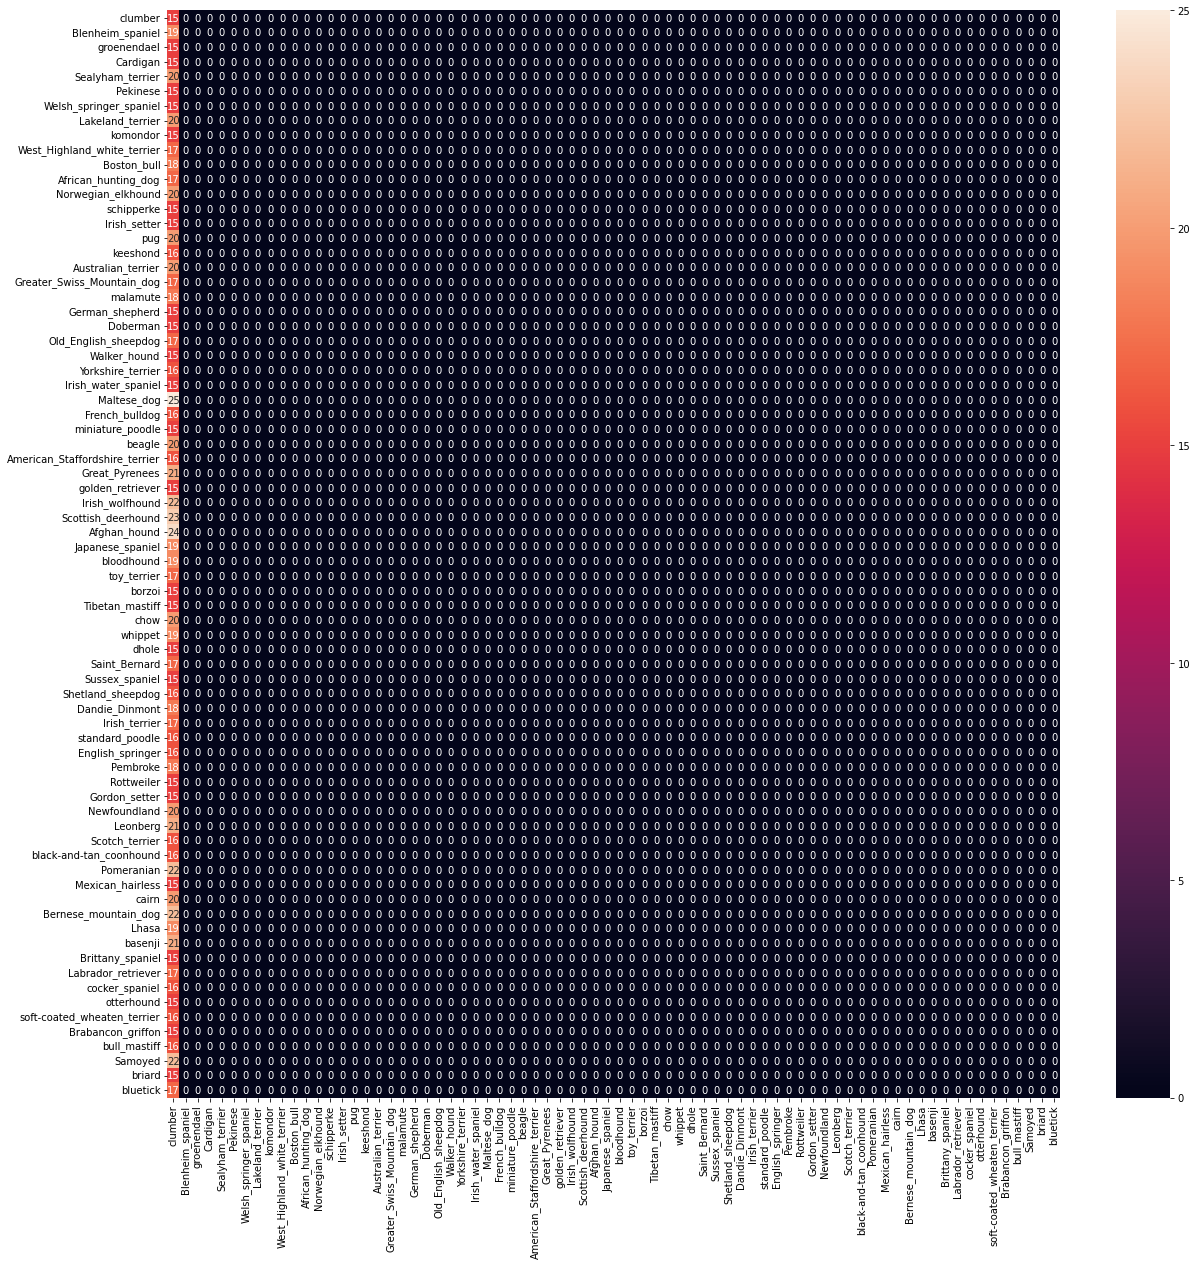

In [12]:
conf_matrix(y_test, y_pred)

---

<a id="section3"></a>
## <font color="#004D7F"> 3. Modelo desde cero</font>

<br>

En este apartado el alumno debe diseñar, entrenar y evaluar diferentes estructuras de redes convolucionales para resolver el problema de clasificación utilizando las diferentes herramientas de `tf.keras`. Se recomienda seguir estructuras de tipo *VGG16* que siguen el siguiente patrón:
* 1 o varios bloques convolucionales compuestos, que incluye:
  * 1 o varias capas convolucionales, todas con activación *ReLU*
  * 1 capa *Max Pooling*
* 1 o varias capas densas o *Fully connected* con activación *ReLU*
* 1 capa de salida con *softmax*
* Para el entrenamiento utilizar la función de perdida: `sparse_categorical_crossentropy`
* Para el entrenamiento utilizar el optimizador: `Adam`

**Recomendaciones:** 
*   Utilizar *kernels* de 3x3 o 5x5. 
*   Comprobar los parámetros y estructura de la red con `summary`.

Se debe realizar al menos la red propuesta en las siguientes celdas y de forma opcional se puede probar otras estructuras para intentar mejorar los resultados.


In [ ]:
# TODO: Crear un tf.data.Dataset para el conjunto de train, validation y test para poder entrenar y evaluar la red

In [13]:
def read_image(image_path, label):
    contents = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(contents, channels=3)
    img = tf.cast(img, tf.float64)
    img /= 255.0
    return img, label

def get_dataset (img_paths, label, target_size, batch=32):
    dataset = tf.data.Dataset.from_tensor_slices((img_paths, label))
    dataset = dataset.map(read_image)
    dataset = dataset.map(lambda x, y: (tf.image.resize(x, target_size), y))

    dataset = dataset.batch(batch)
    dataset = dataset.prefetch(1)

    return dataset

In [14]:
target_size = (100,120)
batch_size = 32

In [15]:
train_dataset = get_dataset(x_train, y_train, target_size, batch_size)
valid_dataset = get_dataset(x_valid, y_valid, target_size, batch_size)
test_dataset = get_dataset(x_test, y_test, target_size, batch_size)

Antes de nada, aunque no se pedía, disminuimos la dimensión del dataset para sobreajustar y ver si se ha hecho correctamente hasta el momento.

In [ ]:
# mini dataset para sobreajustar
mini_train_dataset = get_dataset(x_train[0:500], y_train[0:500], target_size, batch_size)

In [ ]:
# TODO: Crear la arquitectura de la red siguiendo esta estructura:

#    1. Capa convolucional de 32 kernels de 5x5 y con una función de activación ReLU
#    2. Capa Max Pooling de 2x2
#    3. Capa convolucional de 64 kernels de 5x5 y con una función de activación ReLU
#    4. Capa Max Pooling de 2x2
#    5. Capa Fully connected de tamaño 1024 nodos y con una función de activación ReLU
#    6. Capa de salida del tamaño del número de clases

In [ ]:
real_model_mini = tf.keras.Sequential([
                            
                                 tf.keras.layers.Conv2D(32, (5,5), activation = 'relu', input_shape=(100,120,3)),
                                 tf.keras.layers.MaxPool2D(pool_size = (2,2)),
                                 tf.keras.layers.Conv2D(64, (5,5), activation = 'relu'),
                                 tf.keras.layers.MaxPool2D(pool_size = (2,2)),
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(1024, activation='relu'),
                                 tf.keras.layers.Dense(len(classes), activation='softmax')            
])

In [ ]:
real_model_mini.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 96, 116, 32)       2432      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 48, 58, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 44, 54, 64)        51264     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 22, 27, 64)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 38016)             0         
                                                                 
 dense_8 (Dense)             (None, 1024)             

In [ ]:
real_model_mini.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = real_model_mini.fit(mini_train_dataset, epochs=20)

Epoch 1/20
16/16 [==============================] - 2s 88ms/step - loss: 4.5877 - accuracy: 0.0080
Epoch 2/20
16/16 [==============================] - 2s 98ms/step - loss: 4.2623 - accuracy: 0.0440
Epoch 3/20
16/16 [==============================] - 2s 93ms/step - loss: 4.1064 - accuracy: 0.0820
Epoch 4/20
16/16 [==============================] - 1s 88ms/step - loss: 3.1505 - accuracy: 0.3120
Epoch 5/20
16/16 [==============================] - 1s 92ms/step - loss: 1.5455 - accuracy: 0.6520
Epoch 6/20
16/16 [==============================] - 1s 89ms/step - loss: 0.6821 - accuracy: 0.8580
Epoch 7/20
16/16 [==============================] - 1s 90ms/step - loss: 0.3585 - accuracy: 0.9300
Epoch 8/20
16/16 [==============================] - 1s 90ms/step - loss: 0.1751 - accuracy: 0.9700
Epoch 9/20
16/16 [==============================] - 1s 92ms/step - loss: 0.0874 - accuracy: 0.9840
Epoch 10/20
16/16 [==============================] - 1s 88ms/step - loss: 0.0575 - accuracy: 0.9960
Epoch 11/

Efectivamente, este sobreajuste nos indica que está bien creado. Podemos ya proceder con el dataset con su tamaño original:

In [84]:
def read_image(image_path, label):
    contents = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(contents, channels=3)
    img = tf.cast(img, tf.float64)
    img /= 255.0
    return img, label

def get_dataset (img_paths, label, target_size, batch=32):
    dataset = tf.data.Dataset.from_tensor_slices((img_paths, label))
    dataset = dataset.map(read_image)
    dataset = dataset.map(lambda x, y: (tf.image.resize(x, target_size), y))

    dataset = dataset.batch(batch)
    dataset = dataset.prefetch(1)

    return dataset

In [85]:
target_size = (100,120)
batch_size = 32

In [86]:
train_dataset = get_dataset(x_train, y_train, target_size, batch_size)
valid_dataset = get_dataset(x_valid, y_valid, target_size, batch_size)
test_dataset = get_dataset(x_test, y_test, target_size, batch_size)

In [87]:
real_model = tf.keras.Sequential([
                            
                                 tf.keras.layers.Conv2D(32, (5,5), activation = 'relu', input_shape=(100,120,3)),
                                 tf.keras.layers.MaxPool2D(pool_size = (2,2)),
                                 tf.keras.layers.Conv2D(64, (5,5), activation = 'relu'),
                                 tf.keras.layers.MaxPool2D(pool_size = (2,2)),
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(1024, activation='relu'),
                                 tf.keras.layers.Dense(len(classes), activation='softmax')            
])

In [88]:
real_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 96, 116, 32)       2432      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 48, 58, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 44, 54, 64)        51264     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 22, 27, 64)       0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 38016)             0         
                                                                 
 dense_11 (Dense)            (None, 1024)             

In [ ]:
# TODO: Definir un optimizardor Adam con los valores por defecto y la función de perdida sparse_categorical_crossentropy

In [89]:
real_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# TODO: Entrenar con un tamaño de batch de 32 y un número de epochs de 5

In [90]:
history = real_model.fit(train_dataset, epochs=5, validation_data = valid_dataset)

Epoch 1/5
290/290 [==============================] - 46s 158ms/step - loss: 4.3290 - accuracy: 0.0197 - val_loss: 4.2616 - val_accuracy: 0.0327
Epoch 2/5
290/290 [==============================] - 31s 106ms/step - loss: 4.1256 - accuracy: 0.0437 - val_loss: 4.0448 - val_accuracy: 0.0582
Epoch 3/5
290/290 [==============================] - 32s 110ms/step - loss: 3.5928 - accuracy: 0.1400 - val_loss: 4.3421 - val_accuracy: 0.0560
Epoch 4/5
290/290 [==============================] - 31s 107ms/step - loss: 2.3995 - accuracy: 0.4082 - val_loss: 5.8299 - val_accuracy: 0.0616
Epoch 5/5
290/290 [==============================] - 31s 107ms/step - loss: 1.3615 - accuracy: 0.6714 - val_loss: 6.4584 - val_accuracy: 0.0517


In [ ]:
# TODO: Probar el modelo entrenado con el conjunto de test. Mostrar las curvas del historico del entrenamiento y la matriz de confusión sobre el conjunto de test

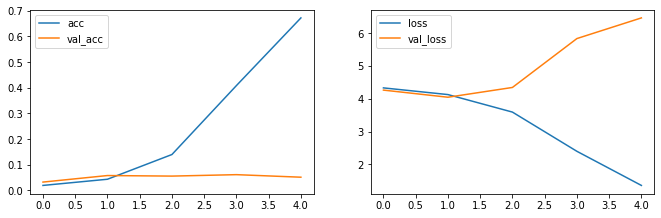

In [91]:
history_graph(history)

In [ ]:
predictions = new_model.predict(test_dataset)

In [ ]:
class_pred = np.argmax(predictions, axis=1)

In [ ]:
class_pred

array([40,  1,  4, ..., 40,  4, 43])

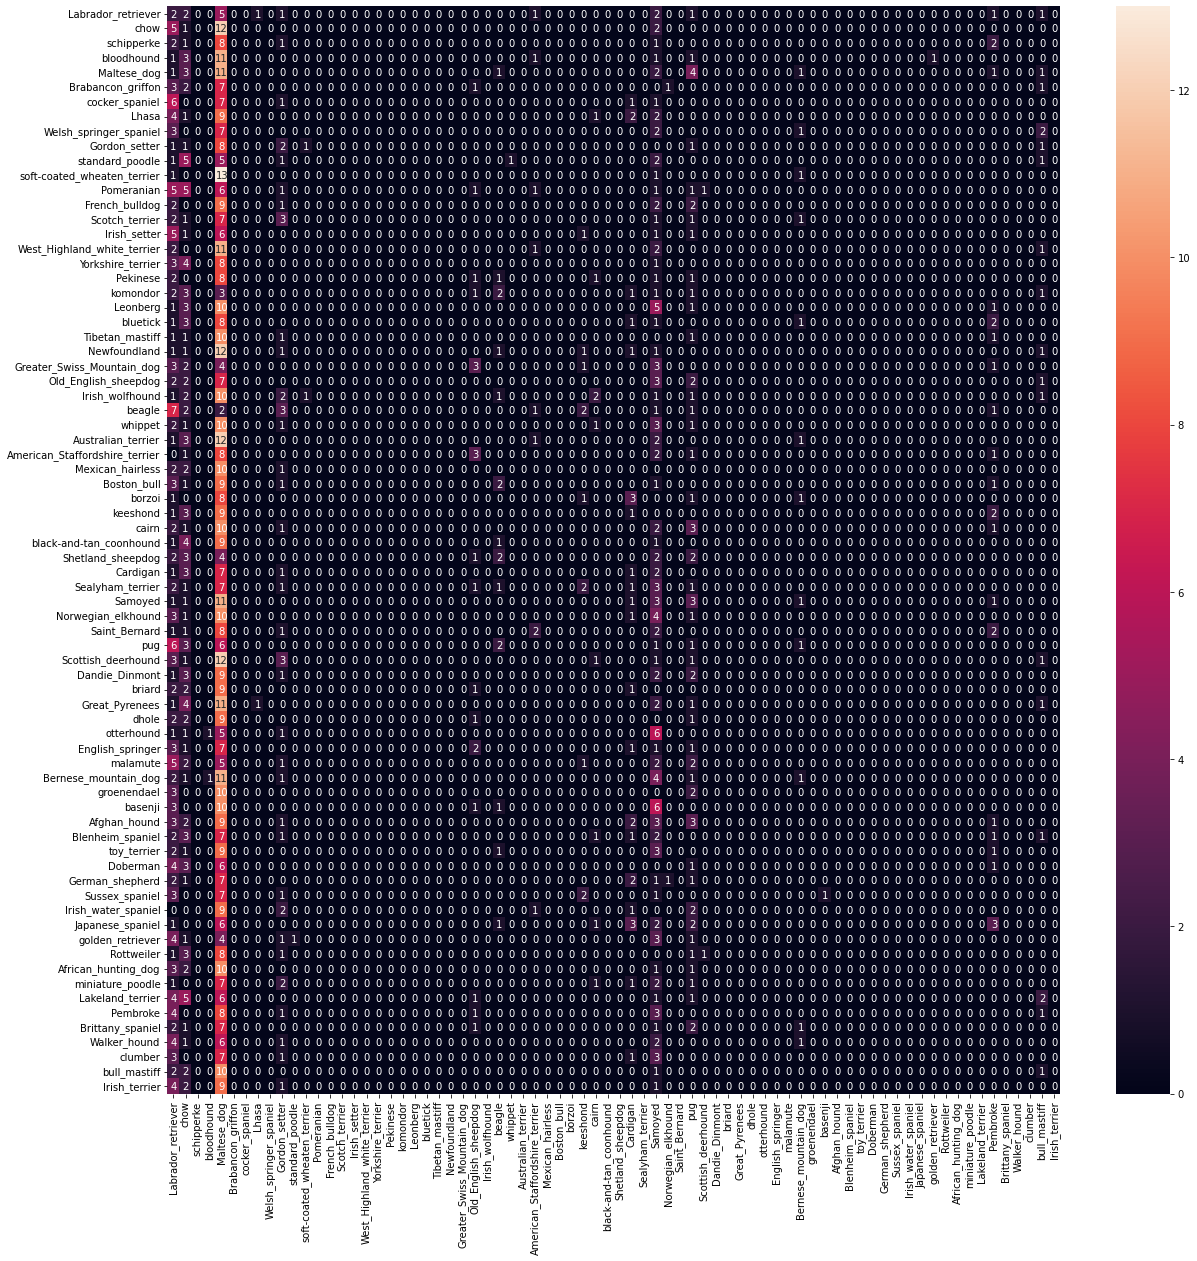

In [ ]:
conf_matrix(y_test, class_pred)

In [ ]:
# [Opcional]: Repetir el proceso modificando la estructura de la red
# También tened en cuenta los callbacks.

Vamos a modificar la arquitectura de antes. Concretamente ahora será de 10 x 10 y añadiremos otra capa Fully Conected de 1024 nodos. Mantenemos le número de batch pero los epochs ahora serán de 8. 


In [16]:
 real_model_improved = tf.keras.Sequential([
                            
                                 tf.keras.layers.Conv2D(32, (5,5), activation = 'relu', input_shape=(100,120,3)),
                                 tf.keras.layers.MaxPool2D(pool_size = (2,2)),
                                 tf.keras.layers.Conv2D(64, (5,5)),
                                 tf.keras.layers.Conv2D(32, (5,5)),
                                 tf.keras.layers.Conv2D(16, (5,5)),
                                 tf.keras.layers.MaxPool2D(pool_size = (2,2)),
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(200, activation="relu"),
                                 tf.keras.layers.Dense(100, activation="relu"),
                                 tf.keras.layers.Dense(len(classes), activation='softmax')
    ])

In [17]:
real_model_improved.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1)


history_improved = real_model_improved.fit(train_dataset, epochs=5, validation_data = valid_dataset, callbacks=[early_stop])

Epoch 1/5
290/290 [==============================] - 30s 101ms/step - loss: 4.2918 - accuracy: 0.0223 - val_loss: 4.2247 - val_accuracy: 0.0323
Epoch 2/5
290/290 [==============================] - 32s 110ms/step - loss: 4.1616 - accuracy: 0.0334 - val_loss: 4.1260 - val_accuracy: 0.0379
Epoch 3/5
290/290 [==============================] - 28s 97ms/step - loss: 4.0347 - accuracy: 0.0494 - val_loss: 4.0613 - val_accuracy: 0.0452
Epoch 4/5
290/290 [==============================] - 28s 97ms/step - loss: 3.8295 - accuracy: 0.0740 - val_loss: 4.1100 - val_accuracy: 0.0577


Hemos mejorado ligeramente el `val_accuracy` respecto al anterior modelo aunque apenas se aprecia mejoría. No obstante, hay que tener en cuenta que con los callbacks el anterior modelo **ya se habría detenido en el segundo epoch**.

Para el el punto siguiente, vamos a seguir empleando la primera estructura de red creada ignorando ésta última.

---

<a id="section4"></a>
## <font color="#004D7F"> 4. Ajuste de hiperparámetros</font>

<br>

En este apartado el objetivo es ajustar  algunos hiperparámetros para conseguir mejorar los resultados. Los hiperparámetros que debéis optimizar son:
  
  1.   Porcentaje de *Dropout*
  2.   Ratio de aprendizaje
  3.   Tamaño del *batch*
  4.   Número de *epochs*
  
*Nota*: no es necesario volver a definir los datasets ya que utilizaremos los mismos del apartado anterior.

In [ ]:
# TODO: modificar la arquitectura de la red elegida en el apartado anterior introduciendo Dropout con valor 0.5

In [108]:
real_model_hyperparameter = tf.keras.Sequential([
                            
                                 tf.keras.layers.Conv2D(32, (5,5), activation = 'relu', input_shape=(100,120,3)),
                                 tf.keras.layers.MaxPool2D(pool_size = (2,2)),
                                 tf.keras.layers.Conv2D(64, (5,5), activation = 'relu'),
                                 tf.keras.layers.MaxPool2D(pool_size = (2,2)),
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(1024, activation='relu'),
                                 tf.keras.layers.Dropout(.5),
                                 tf.keras.layers.Dense(len(classes), activation='softmax')            
])

In [109]:
real_model_hyperparameter.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 96, 116, 32)       2432      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 48, 58, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 44, 54, 64)        51264     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 22, 27, 64)       0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 38016)             0         
                                                                 
 dense_18 (Dense)            (None, 1024)            

In [ ]:
# TODO: modificar el optimizador Adam variando el ratio de aprendizaje a 0.0001 (por defecto el valor es 0.001)

In [19]:
real_model_hyperparameter.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# TODO: modificar el tamaño del batch y el número de epochs:

#    - Tamaño del batch: 64
#    - Número de epochs: 10

In [20]:
history_hyperparameter = real_model_hyperparameter.fit(train_dataset, epochs= 10, batch_size= 64, validation_data = valid_dataset)

Epoch 1/10
290/290 [==============================] - 42s 105ms/step - loss: 4.3181 - accuracy: 0.0152 - val_loss: 4.2972 - val_accuracy: 0.0198
Epoch 2/10
290/290 [==============================] - 30s 103ms/step - loss: 4.3003 - accuracy: 0.0206 - val_loss: 4.2672 - val_accuracy: 0.0358
Epoch 3/10
290/290 [==============================] - 31s 106ms/step - loss: 4.2094 - accuracy: 0.0346 - val_loss: 4.1520 - val_accuracy: 0.0495
Epoch 4/10
290/290 [==============================] - 30s 104ms/step - loss: 3.9151 - accuracy: 0.0819 - val_loss: 4.2909 - val_accuracy: 0.0379
Epoch 5/10
290/290 [==============================] - 31s 105ms/step - loss: 3.5012 - accuracy: 0.1766 - val_loss: 4.8328 - val_accuracy: 0.0383
Epoch 6/10
290/290 [==============================] - 30s 104ms/step - loss: 3.0551 - accuracy: 0.2774 - val_loss: 5.0405 - val_accuracy: 0.0418
Epoch 7/10
290/290 [==============================] - 31s 107ms/step - loss: 2.5826 - accuracy: 0.3871 - val_loss: 5.3555 - val_ac

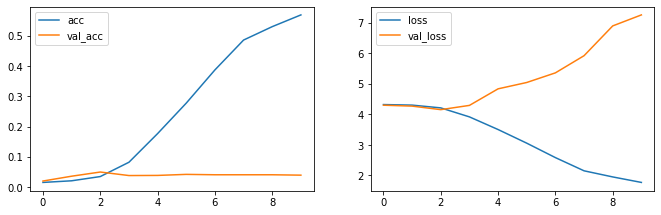

In [21]:
history_graph(history_hyperparameter)

In [22]:
predictions = real_model.predict(test_dataset)

In [23]:
class_pred = np.argmax(predictions, axis=1)

In [24]:
class_pred

array([72, 63, 48, ..., 61, 63, 26])

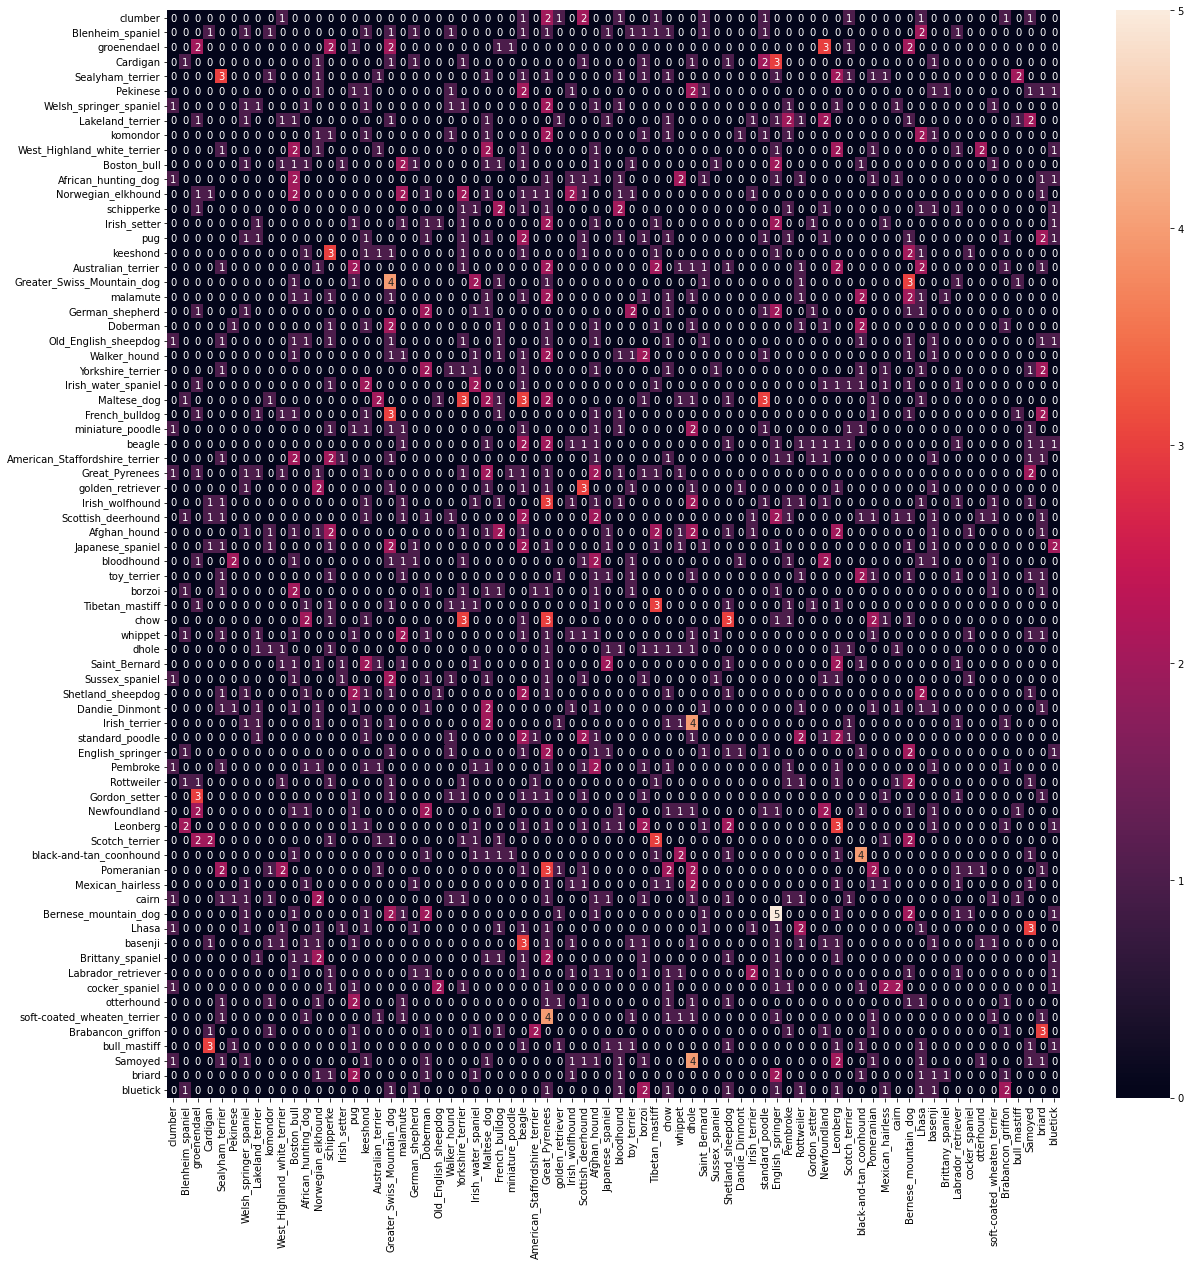

In [25]:
conf_matrix(y_test, class_pred)

In [ ]:
# [Opcional]: Probar diferentes combinaciones de los valores anteriores

Le añadimos:

- Una capa convolucional de 128 kernels de 5x5 y con una función de activación ReLU.
- Otra capa Max Pooling de 2x2.
- Una capa Fully connected de tamaño 700 nodos y con una función de activación ReLU

In [101]:
real_model_improved = tf.keras.Sequential([
                            
                                 tf.keras.layers.Conv2D(32, (5,5), activation = 'relu', input_shape=(100,120,3)),
                                 tf.keras.layers.MaxPool2D(pool_size = (2,2)),
                                 tf.keras.layers.Conv2D(64, (5,5), activation = 'relu'),
                                 tf.keras.layers.MaxPool2D(pool_size = (2,2)),
                                 tf.keras.layers.Conv2D(128, (5,5), activation = 'relu'),
                                 tf.keras.layers.MaxPool2D(pool_size = (2,2)),
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(1024, activation='relu'),
                                 tf.keras.layers.Dense(700, activation='relu'),
                                 tf.keras.layers.Dropout(.5),
                                 tf.keras.layers.Dense(len(classes), activation='softmax')            
])

In [103]:
real_model_improved.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy']) # Dejamos el learning_rate igual

In [104]:
history_hyperparameter_improved = real_model_improved.fit(train_dataset, epochs= 10, batch_size= 64, validation_data = valid_dataset)

Epoch 1/10
290/290 [==============================] - 33s 109ms/step - loss: 4.3045 - accuracy: 0.0152 - val_loss: 4.2974 - val_accuracy: 0.0198
Epoch 2/10
290/290 [==============================] - 31s 108ms/step - loss: 4.2987 - accuracy: 0.0162 - val_loss: 4.2961 - val_accuracy: 0.0198
Epoch 3/10
290/290 [==============================] - 32s 110ms/step - loss: 4.2981 - accuracy: 0.0189 - val_loss: 4.2952 - val_accuracy: 0.0198
Epoch 4/10
290/290 [==============================] - 41s 139ms/step - loss: 4.2971 - accuracy: 0.0192 - val_loss: 4.2946 - val_accuracy: 0.0198
Epoch 5/10
290/290 [==============================] - 31s 106ms/step - loss: 4.2967 - accuracy: 0.0185 - val_loss: 4.2945 - val_accuracy: 0.0198
Epoch 6/10
290/290 [==============================] - 35s 121ms/step - loss: 4.2968 - accuracy: 0.0196 - val_loss: 4.2944 - val_accuracy: 0.0198
Epoch 7/10
290/290 [==============================] - 34s 117ms/step - loss: 4.2965 - accuracy: 0.0188 - val_loss: 4.2944 - val_ac

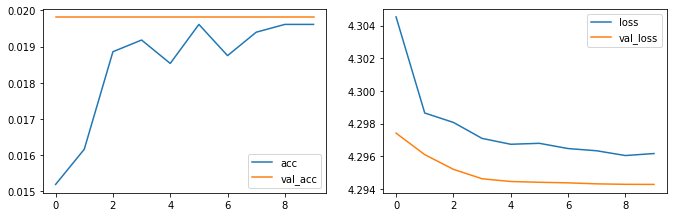

In [105]:
history_graph(history_hyperparameter_improved)

No solo no ha mejorado sino que estamos en un **claro caso de subajuste** (el `accuracy` de validación está por encima del entrenamiento).

---

<a id="section5"></a>
## <font color="#004D7F"> 5. Modelos pre-entrenados</font>

<br>

En este apartado vamos a trabajar con *Finetuning*, la técnica de *Transfer Learning*. El objetivo es tratar de resolver el problema ajustando diferentes redes pre-entrenadas. Como ya se comentó, `tf.keras` dispone de multitud de modelos pre-entrenados en el problema de *ImageNet* y que se encuentran en el módulo [Applications](https://keras.io/applications/). Se pide que el alumno realice el proceso de *Finetuning* en al menos 3 redes de este módulo, estas son:

  *   *MobileNet*
  *   *InceptionV3*
  *   *VGG16*

Opcionalmente el alumno puede probar otras redes pre-entrenadas. Recomendamos mirar la tabla del siguiente [enlace](https://keras.io/applications/#documentation-for-individual-models), donde se muestra el rendimiento de las diferentes arquitecturas.


### MobileNet

In [ ]:
# TODO: Crear un iterador para el conjunto de train, validation y test para poder entrenar y evaluar la red, 
# y que utilice el preprocesamiento de MobileNet

In [26]:
def read_image_transfer(image_path, label):
    contents = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(contents, channels=3)
    img = tf.cast(img, tf.float64)
    return img, label

def get_dataset_transfer(img_paths, label, target_size, prep_func, batch=32):
    dataset = tf.data.Dataset.from_tensor_slices((img_paths, label))
    dataset = dataset.map(read_image_transfer)
    dataset = dataset.map(lambda x, y: (tf.image.resize(x, target_size), y))    
    dataset = dataset.map(lambda x, y: (prep_func(x), y))

    dataset = dataset.batch(batch)
    dataset = dataset.prefetch(1)

    return dataset

In [27]:
train_dataset_mobilenet = get_dataset_transfer(x_train, y_train, (224,224), tf.keras.applications.mobilenet.preprocess_input, 32)
valid_dataset_mobilenet = get_dataset_transfer(x_valid, y_valid, (224,224), tf.keras.applications.mobilenet.preprocess_input, 32)
test_dataset_mobilenet = get_dataset_transfer(x_test, y_test, (224,224), tf.keras.applications.mobilenet.preprocess_input, 32)

In [ ]:
# TODO: Crear la arquitectura de la red siguiendo esta estructura:

#    1. Cargar la red de tf.keras.applications sin incluir las últimas capas (include_top=False)
#    2. Conectar una capa de salida del tamaño del número de clases

In [28]:
mobilenet_base_model = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, pooling=None , input_shape=(224, 224, 3))

17235968/17225924 [==============================] - 1s 0us/step


In [29]:
# y congelamos el entrenamiento en todas las capas
for layer in mobilenet_base_model.layers:
    layer.trainable = False

In [30]:
new_mobilenet_model = tf.keras.Sequential(mobilenet_base_model.layers)
new_mobilenet_model.add(tf.keras.layers.Flatten())
new_mobilenet_model.add(tf.keras.layers.Dense(len(classes), activation='softmax'))

In [31]:
new_mobilenet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                          
                                                                 
 conv_dw_1_relu (ReLU)       (None, 112, 112, 32)     

In [ ]:
# TODO: Definir un optimizardor Adam con los valores por defector y la función de perdida categorical_crossentropy

In [32]:
new_mobilenet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# TODO: Entrenar con un tamaño de batch de 32 y un número de epochs de 10

In [33]:
history_mobilenet = new_mobilenet_model.fit(train_dataset_mobilenet, epochs=10,  batch_size= 32, validation_data=valid_dataset_mobilenet)

Epoch 1/10
290/290 [==============================] - 35s 113ms/step - loss: 8.2213 - accuracy: 0.6004 - val_loss: 7.4987 - val_accuracy: 0.6734
Epoch 2/10
290/290 [==============================] - 34s 118ms/step - loss: 1.9374 - accuracy: 0.9037 - val_loss: 6.7984 - val_accuracy: 0.7626
Epoch 3/10
290/290 [==============================] - 34s 116ms/step - loss: 1.0482 - accuracy: 0.9441 - val_loss: 7.9445 - val_accuracy: 0.7424
Epoch 4/10
290/290 [==============================] - 35s 119ms/step - loss: 0.7360 - accuracy: 0.9661 - val_loss: 9.1860 - val_accuracy: 0.7380
Epoch 5/10
290/290 [==============================] - 34s 115ms/step - loss: 0.7268 - accuracy: 0.9670 - val_loss: 8.6226 - val_accuracy: 0.7527
Epoch 6/10
290/290 [==============================] - 34s 116ms/step - loss: 0.7980 - accuracy: 0.9686 - val_loss: 9.7063 - val_accuracy: 0.7441
Epoch 7/10
290/290 [==============================] - 32s 112ms/step - loss: 0.8536 - accuracy: 0.9705 - val_loss: 11.0647 - val_a

In [ ]:
# TODO: Probar el modelo entrenado con el conjunto de test. Mostrar las curvas del historico del entrenamiento y la matriz de confusión

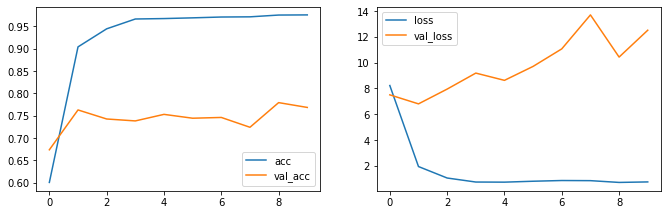

In [35]:
history_graph(history_mobilenet)

In [36]:
predictions = new_mobilenet_model.predict(test_dataset_mobilenet)

In [37]:
class_pred = np.argmax(predictions, axis=1)

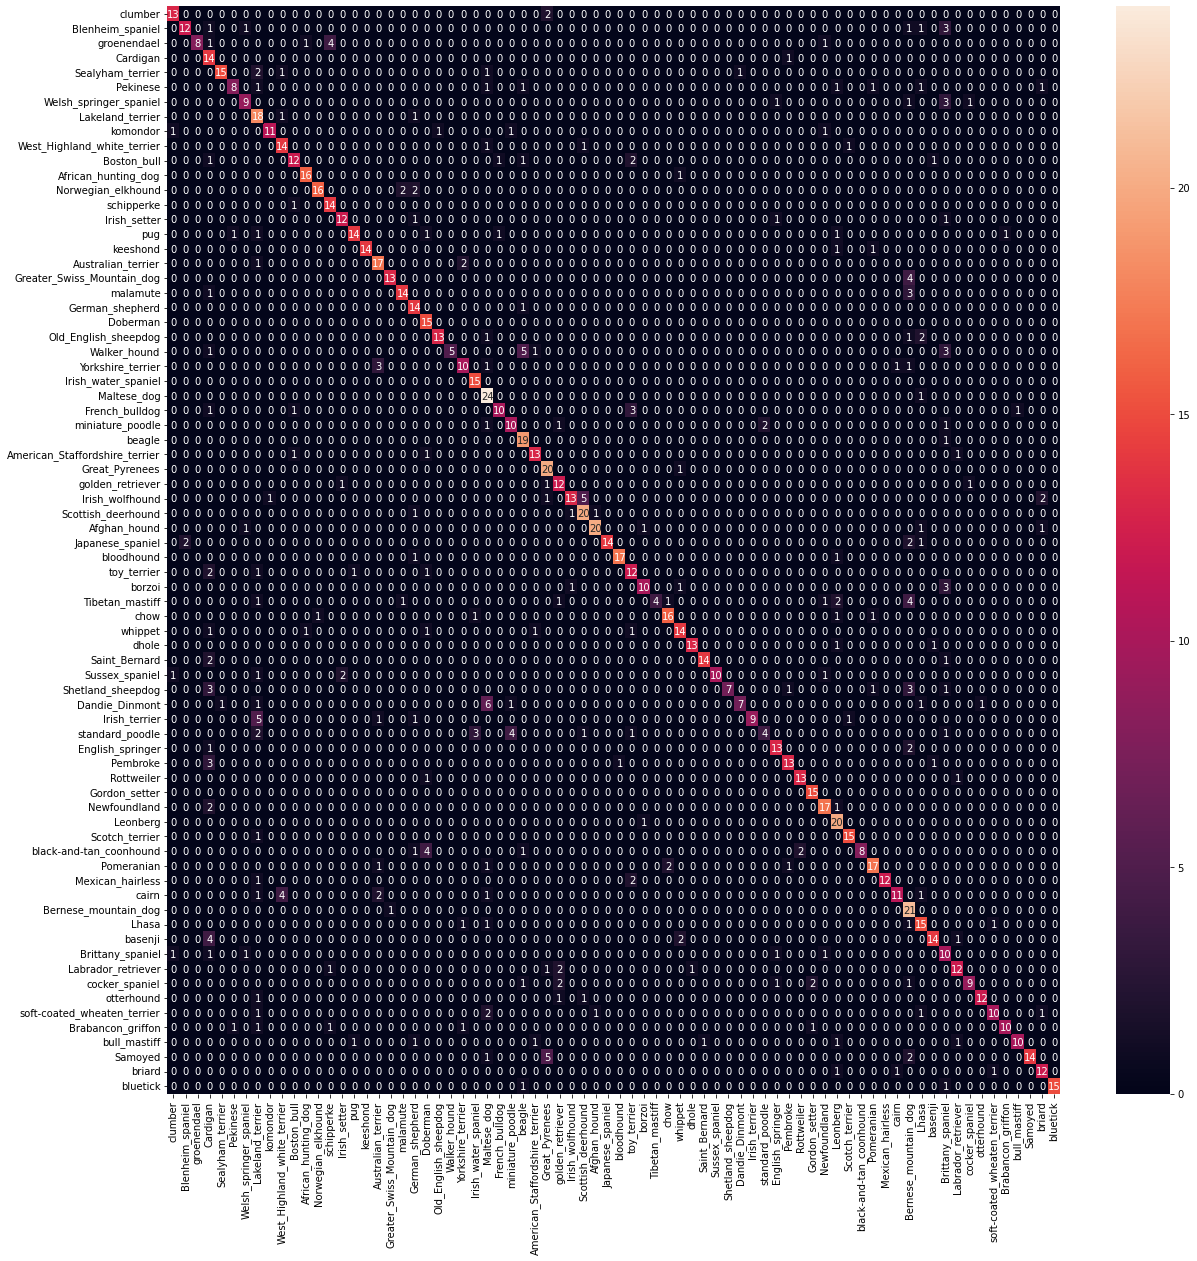

In [38]:
conf_matrix(y_test, class_pred)

In [ ]:
# [Opcional]: Incluir antes de la capa de salida capas como Fully connected y Dropout

### InceptionV3

In [ ]:
# TODO: Crear un iterador para el conjunto de train, validation y test para poder entrenar y evaluar la red, 
# y que utilice el preprocesamiento de InceptionV3

In [39]:
def read_image_transfer(image_path, label):
    contents = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(contents, channels=3)
    img = tf.cast(img, tf.float64)
    return img, label

def get_dataset_transfer(img_paths, label, target_size, prep_func, batch=32):
    dataset = tf.data.Dataset.from_tensor_slices((img_paths, label))
    dataset = dataset.map(read_image_transfer)
    dataset = dataset.map(lambda x, y: (tf.image.resize(x, target_size), y))    
    dataset = dataset.map(lambda x, y: (prep_func(x), y))

    dataset = dataset.batch(batch)
    dataset = dataset.prefetch(1)

    return dataset

In [40]:
train_dataset_inceptionv3 = get_dataset_transfer(x_train, y_train, (224,224), tf.keras.applications.inception_v3.preprocess_input, 32)
valid_dataset_inceptionv3 = get_dataset_transfer(x_valid, y_valid, (224,224), tf.keras.applications.inception_v3.preprocess_input, 32)
test_dataset_inceptionv3 = get_dataset_transfer(x_test, y_test, (224,224), tf.keras.applications.inception_v3.preprocess_input, 32)

In [ ]:
# TODO: Crear la arquitectura de la red siguiendo esta estructura:

#    1. Cargar la red de tf.keras.applications sin incluir las últimas capas (include_top=False)
#    2. Conectar una capa de salida del tamaño del número de clases

In [41]:
inceptionv3_base_model = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, pooling=None , input_shape=(224, 224, 3))

In [42]:
# y congelamos el entrenamiento en todas las capas
for layer in inceptionv3_base_model.layers:
    layer.trainable = False

In [43]:
new_inceptionv3_model = tf.keras.Sequential(inceptionv3_base_model.layers)
new_inceptionv3_model.add(tf.keras.layers.Flatten())
new_inceptionv3_model.add(tf.keras.layers.Dense(len(classes), activation='softmax'))

In [45]:
new_inceptionv3_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                          
                                                                 
 conv_dw_1_relu (ReLU)       (None, 112, 112, 32)     

In [ ]:
# TODO: Definir un optimizardor Adam con los valores por defector y la función de perdida categorical_crossentropy

In [44]:
new_inceptionv3_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# TODO: Entrenar con un tamaño de batch de 32 y un número de epochs de 10

In [46]:
history_inceptionv3 = new_inceptionv3_model.fit(train_dataset_inceptionv3, epochs=10,  batch_size= 32, validation_data=valid_dataset_inceptionv3)

Epoch 1/10
290/290 [==============================] - 36s 119ms/step - loss: 8.4006 - accuracy: 0.6001 - val_loss: 7.7916 - val_accuracy: 0.6980
Epoch 2/10
290/290 [==============================] - 33s 112ms/step - loss: 1.9909 - accuracy: 0.9005 - val_loss: 8.3750 - val_accuracy: 0.7109
Epoch 3/10
290/290 [==============================] - 32s 111ms/step - loss: 1.0091 - accuracy: 0.9489 - val_loss: 7.7955 - val_accuracy: 0.7514
Epoch 4/10
290/290 [==============================] - 34s 119ms/step - loss: 0.7984 - accuracy: 0.9622 - val_loss: 8.9203 - val_accuracy: 0.7355
Epoch 5/10
290/290 [==============================] - 38s 132ms/step - loss: 0.5966 - accuracy: 0.9725 - val_loss: 7.1833 - val_accuracy: 0.7867
Epoch 6/10
290/290 [==============================] - 42s 146ms/step - loss: 0.6542 - accuracy: 0.9725 - val_loss: 10.3367 - val_accuracy: 0.7462
Epoch 7/10
290/290 [==============================] - 35s 121ms/step - loss: 0.7338 - accuracy: 0.9714 - val_loss: 13.2365 - val_

In [ ]:
# TODO: Probar el modelo entrenado con el conjunto de test. Mostrar las curvas del historico del entrenamiento y la matriz de confusión

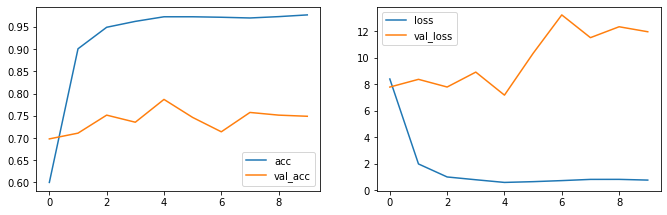

In [47]:
history_graph(history_inceptionv3)

In [48]:
predictions = new_inceptionv3_model.predict(test_dataset_inceptionv3)

In [49]:
class_pred = np.argmax(predictions, axis=1)

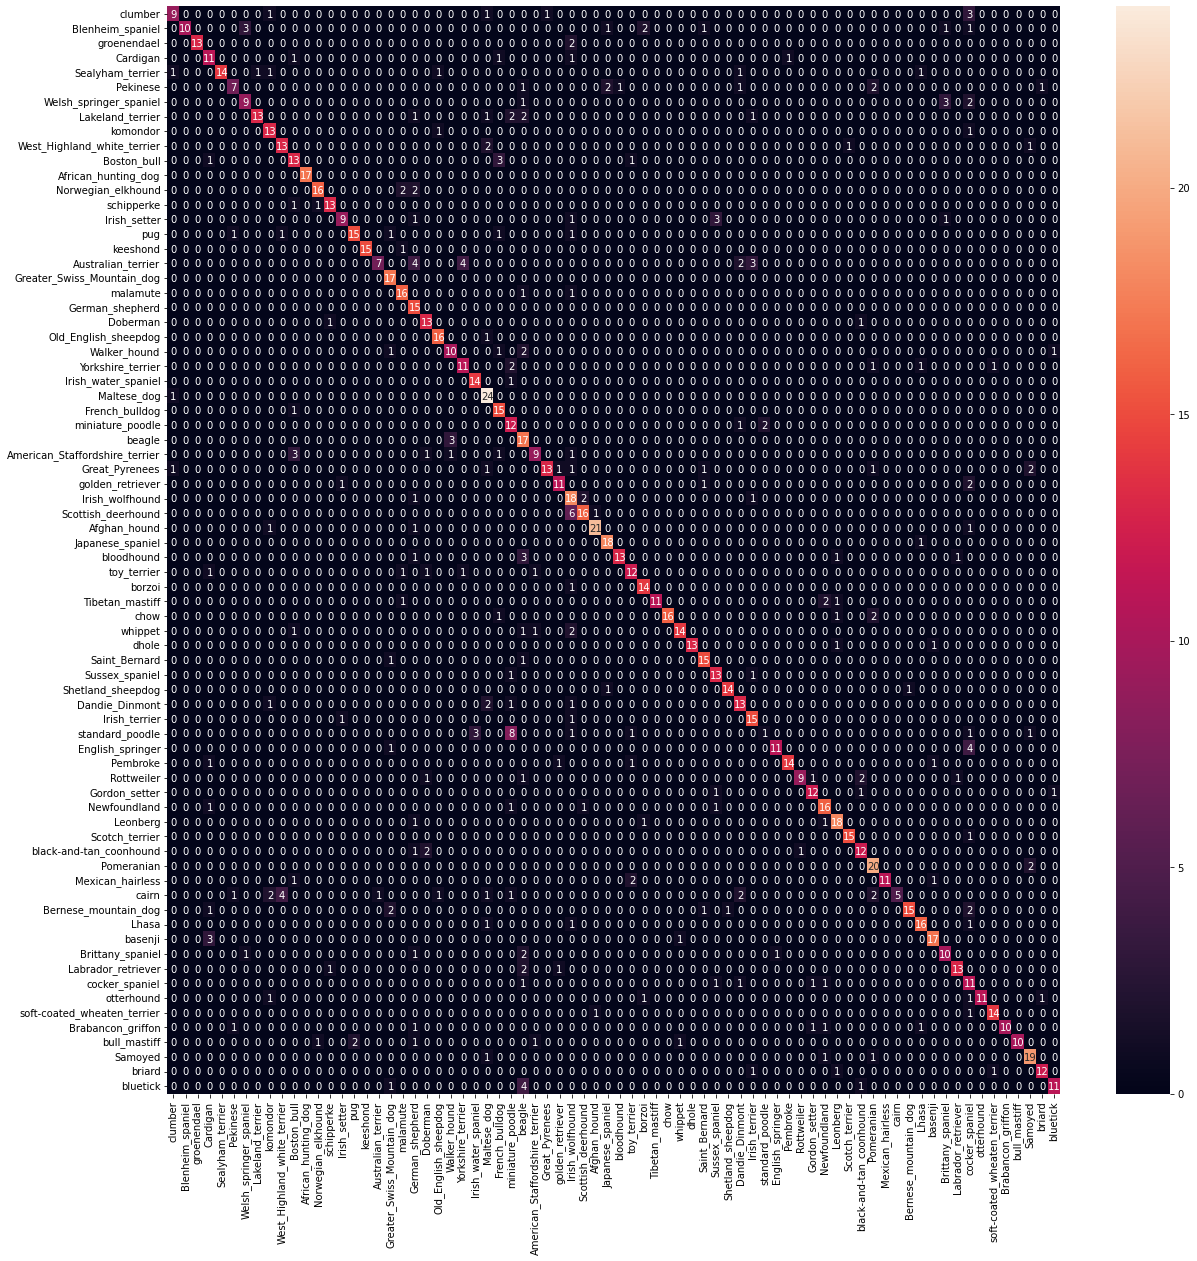

In [50]:
conf_matrix(y_test, class_pred)

In [ ]:
# [Opcional]: Incluir antes de la capa de salida capas como Fully connected y Dropout

### VGG16

In [ ]:
# TODO: Crear un iterador para el conjunto de train, validation y test para poder entrenar y evaluar la red, 
# y que utilice el preprocesamiento de VGG16

In [51]:
def read_image_transfer(image_path, label):
    contents = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(contents, channels=3)
    img = tf.cast(img, tf.float64)
    return img, label

def get_dataset_transfer(img_paths, label, target_size, prep_func, batch=32):
    dataset = tf.data.Dataset.from_tensor_slices((img_paths, label))
    dataset = dataset.map(read_image_transfer)
    dataset = dataset.map(lambda x, y: (tf.image.resize(x, target_size), y))    
    dataset = dataset.map(lambda x, y: (prep_func(x), y))

    dataset = dataset.batch(batch)
    dataset = dataset.prefetch(1)

    return dataset

In [52]:
train_dataset_vgg16 = get_dataset_transfer(x_train, y_train, (224,224), tf.keras.applications.vgg16.preprocess_input, 32)
valid_dataset_vgg16 = get_dataset_transfer(x_valid, y_valid, (224,224), tf.keras.applications.vgg16.preprocess_input, 32)
test_dataset_vgg16 = get_dataset_transfer(x_test, y_test, (224,224), tf.keras.applications.vgg16.preprocess_input, 32)

In [ ]:
# TODO: Crear la arquitectura de la red siguiendo esta estructura:

#    1. Cargar la red de tf.keras.applications incluiyendo las últimas capas (include_top=True)
#    2. Conectar una capa de salida a fc2 del tamaño del número de clases

In [53]:
vgg_base_model = tf.keras.applications.vgg16.VGG16(weights='imagenet', include_top=True)

553476096/553467096 [==============================] - 4s 0us/step


In [54]:
# y congelamos el entrenamiento en todas las capas
for layer in vgg_base_model.layers:
    layer.trainable = False

In [55]:
new_vgg_model = tf.keras.Sequential(vgg_base_model.layers)
new_vgg_model.add(tf.keras.layers.Flatten())
new_vgg_model.add(tf.keras.layers.Dense(len(classes), activation='softmax'))

In [56]:
new_vgg_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [ ]:
# TODO: Definir un optimizardor Adam con los valores por defector y la función de perdida categorical_crossentropy

In [57]:
new_vgg_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# TODO: Entrenar con un tamaño de batch de 32 y un número de epochs de 10

In [58]:
history_vgg16 = new_vgg_model.fit(train_dataset_vgg16, epochs=10,  batch_size= 32, validation_data=valid_dataset_vgg16)

Epoch 1/10
290/290 [==============================] - 66s 217ms/step - loss: 4.1820 - accuracy: 0.4963 - val_loss: 4.0613 - val_accuracy: 0.7355
Epoch 2/10
290/290 [==============================] - 60s 207ms/step - loss: 3.9411 - accuracy: 0.7747 - val_loss: 3.8278 - val_accuracy: 0.7958
Epoch 3/10
290/290 [==============================] - 61s 209ms/step - loss: 3.7066 - accuracy: 0.8046 - val_loss: 3.6000 - val_accuracy: 0.8074
Epoch 4/10
290/290 [==============================] - 59s 205ms/step - loss: 3.4780 - accuracy: 0.8147 - val_loss: 3.3782 - val_accuracy: 0.8199
Epoch 5/10
290/290 [==============================] - 61s 209ms/step - loss: 3.2558 - accuracy: 0.8300 - val_loss: 3.1630 - val_accuracy: 0.8311
Epoch 6/10
290/290 [==============================] - 71s 243ms/step - loss: 3.0404 - accuracy: 0.8417 - val_loss: 2.9548 - val_accuracy: 0.8410
Epoch 7/10
290/290 [==============================] - 60s 207ms/step - loss: 2.8325 - accuracy: 0.8475 - val_loss: 2.7544 - val_ac

In [ ]:
# TODO: Probar el modelo entrenado con el conjunto de test. Mostrar las curvas del historico del entrenamiento y la matriz de confusión

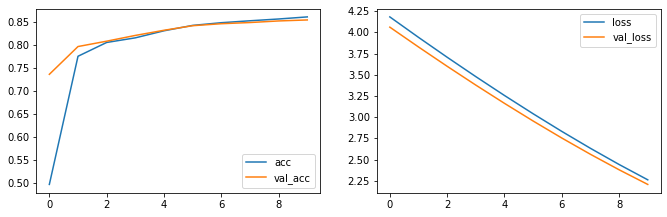

In [59]:
history_graph(history_vgg16)

In [60]:
predictions = new_vgg_model.predict(test_dataset_vgg16)

In [61]:
class_pred = np.argmax(predictions, axis=1)

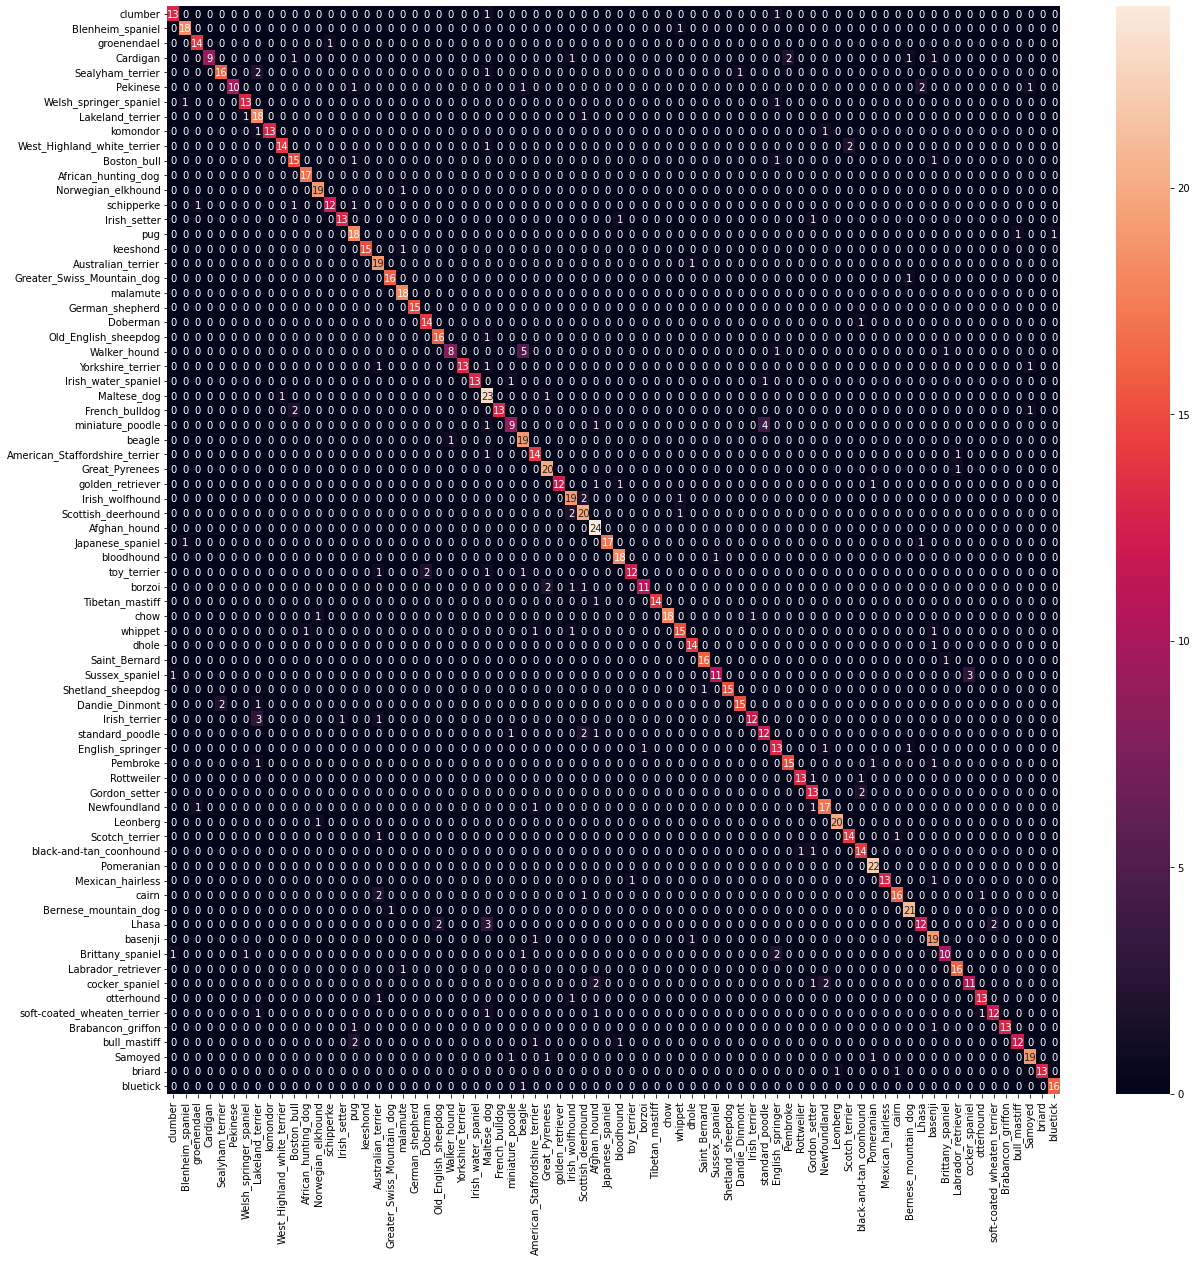

In [62]:
conf_matrix(y_test, class_pred)

In [ ]:
# [Opcional]: Incluir antes de la capa de salida capas como Fully connected y Dropout

---

<a id="section6"></a>
## <font color="#004D7F"> 6. Data Augmentation </font>

<br>

En este apartado aplicaremos algunas de las capas de *data augmentation* vistas.

El alumno deberá realizar un *data augmentation* estocástico sobre algunas de las redes obtenidas en los apartados anteriores y tratar de mejorar el rendimiento de las redes. Se puede utilizar una o varias de las siguientes modificaciones:
  *    Flip horizontal
  *    Flip vertical
  *    Brillo
  *    Rotación
  
Es posible aplicar también estas capas junto con las redes pre-entrenadas, por lo que se propone al alumno que también intente aplicar este *data augmentation* durante el proceso de *Finetuning* de la red. Además, el alumno deberá contestar a la siguiente cuestión:
*   ¿Hay alguna diferencia de aplicar *data augmentation* a la red creada desde cero frente a las pre-entrenadas?

Primero vamos a coger la estructura de red creada a partir de los hiperparámetros marcados en el punto 4, añadiendo `Flip vertical` y una `Rotación` de factor 0,2.



In [112]:
augmentation_model = tf.keras.Sequential([
                                 tf.keras.layers.RandomFlip('vertical'),
                                 tf.keras.layers.RandomRotation(0.2), 
                                 tf.keras.layers.Conv2D(32, (5,5), activation = 'relu', input_shape=(100,120,3)),
                                 tf.keras.layers.MaxPool2D(pool_size = (2,2)),
                                 tf.keras.layers.Conv2D(64, (5,5), activation = 'relu'),
                                 tf.keras.layers.MaxPool2D(pool_size = (2,2)),
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(1024, activation='relu'),
                                 tf.keras.layers.Dropout(.5),
                                 tf.keras.layers.Dense(len(classes), activation='softmax')            
])

In [64]:
augmentation_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [65]:
history_augmentation = augmentation_model.fit(train_dataset, epochs= 10, batch_size= 64, validation_data = valid_dataset)

Epoch 1/10
290/290 [==============================] - 31s 101ms/step - loss: 4.3259 - accuracy: 0.0177 - val_loss: 4.2913 - val_accuracy: 0.0276
Epoch 2/10
290/290 [==============================] - 31s 105ms/step - loss: 4.2594 - accuracy: 0.0292 - val_loss: 4.1860 - val_accuracy: 0.0444
Epoch 3/10
290/290 [==============================] - 30s 102ms/step - loss: 4.1482 - accuracy: 0.0330 - val_loss: 4.1000 - val_accuracy: 0.0439
Epoch 4/10
290/290 [==============================] - 30s 103ms/step - loss: 4.0818 - accuracy: 0.0421 - val_loss: 4.0550 - val_accuracy: 0.0452
Epoch 5/10
290/290 [==============================] - 30s 103ms/step - loss: 4.0125 - accuracy: 0.0491 - val_loss: 3.9728 - val_accuracy: 0.0543
Epoch 6/10
290/290 [==============================] - 31s 107ms/step - loss: 3.9469 - accuracy: 0.0582 - val_loss: 3.9340 - val_accuracy: 0.0612
Epoch 7/10
290/290 [==============================] - 30s 103ms/step - loss: 3.8759 - accuracy: 0.0736 - val_loss: 3.8715 - val_ac

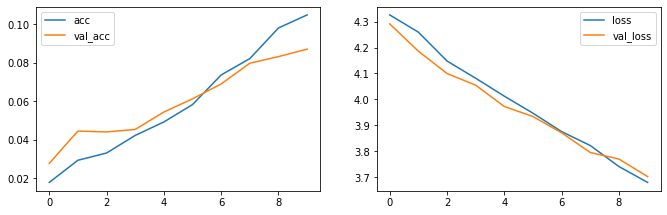

In [66]:
history_graph(history_augmentation)

In [67]:
predictions = augmentation_model.predict(test_dataset)

In [68]:
class_pred = np.argmax(predictions, axis=1)

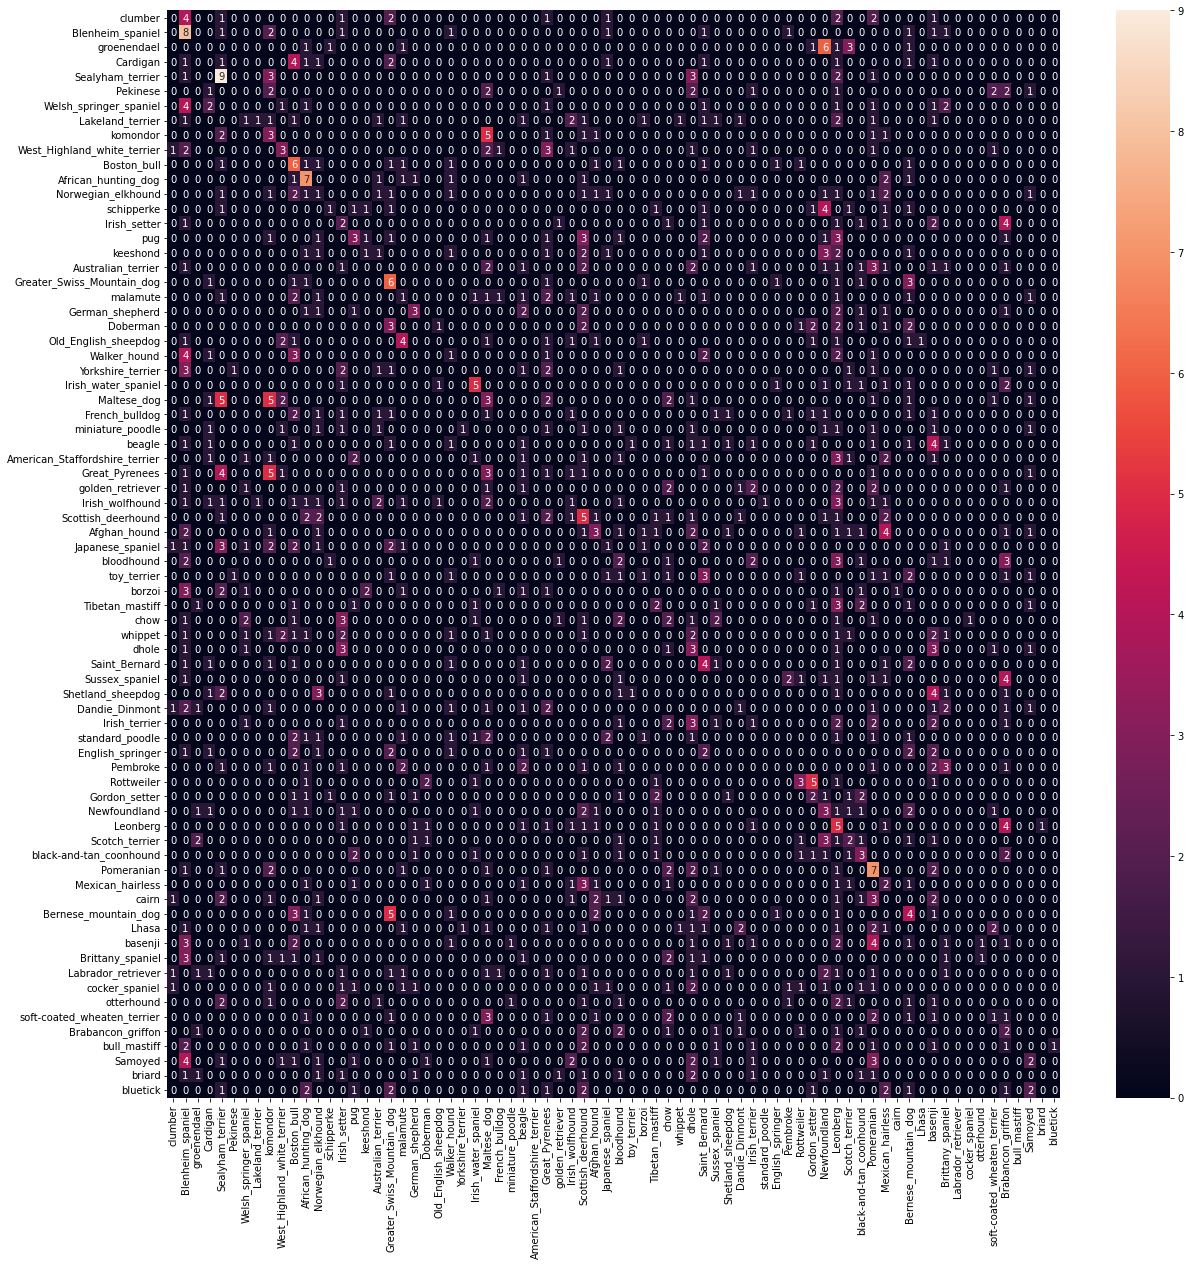

In [69]:
conf_matrix(y_test, class_pred)

Para responder la pregunta planteada en este punto, necesitamos realizar el mismo caso pero **este vez con una red ya pre-entrenada**. Vamos a coger para ello la red que mejor resultados ha dado que es la de VGG16.

Para que no haya diferencias, las modificaciones de data augmentation van a ser las mismas que en el anterior caso.

In [70]:
def read_image_transfer(image_path, label):
    contents = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(contents, channels=3)
    img = tf.cast(img, tf.float64)
    return img, label

def get_dataset_transfer(img_paths, label, target_size, prep_func, batch=32):
    dataset = tf.data.Dataset.from_tensor_slices((img_paths, label))
    dataset = dataset.map(read_image_transfer)
    dataset = dataset.map(lambda x, y: (tf.image.resize(x, target_size), y))    
    dataset = dataset.map(lambda x, y: (prep_func(x), y))

    dataset = dataset.batch(batch)
    dataset = dataset.prefetch(1)

    return dataset

In [71]:
train_dataset_vgg16 = get_dataset_transfer(x_train, y_train, (224,224), tf.keras.applications.vgg16.preprocess_input, 32)
valid_dataset_vgg16 = get_dataset_transfer(x_valid, y_valid, (224,224), tf.keras.applications.vgg16.preprocess_input, 32)
test_dataset_vgg16 = get_dataset_transfer(x_test, y_test, (224,224), tf.keras.applications.vgg16.preprocess_input, 32)

In [72]:
vgg_base_model_augmentation = tf.keras.Sequential([
                                 tf.keras.layers.RandomFlip('vertical'),
                                 tf.keras.layers.RandomRotation(0.2)
])

In [73]:
vgg_base_model_augmentation = tf.keras.applications.vgg16.VGG16(weights='imagenet', include_top=True)

In [74]:
for layer in vgg_base_model_augmentation.layers:
    layer.trainable = False

In [75]:
new_vgg_model_augmentation = tf.keras.Sequential(vgg_base_model_augmentation.layers)
new_vgg_model_augmentation.add(tf.keras.layers.Flatten())
new_vgg_model_augmentation.add(tf.keras.layers.Dense(len(classes), activation='softmax'))

In [76]:
new_vgg_model_augmentation.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [77]:
history_vgg16_augmentation = new_vgg_model_augmentation.fit(train_dataset_vgg16, epochs=10,  batch_size= 32, validation_data=valid_dataset_vgg16)

Epoch 1/10
290/290 [==============================] - 67s 229ms/step - loss: 4.1841 - accuracy: 0.4727 - val_loss: 4.0631 - val_accuracy: 0.7350
Epoch 2/10
290/290 [==============================] - 60s 207ms/step - loss: 3.9432 - accuracy: 0.7718 - val_loss: 3.8296 - val_accuracy: 0.7850
Epoch 3/10
290/290 [==============================] - 60s 208ms/step - loss: 3.7088 - accuracy: 0.8087 - val_loss: 3.6018 - val_accuracy: 0.8130
Epoch 4/10
290/290 [==============================] - 61s 209ms/step - loss: 3.4802 - accuracy: 0.8263 - val_loss: 3.3801 - val_accuracy: 0.8268
Epoch 5/10
290/290 [==============================] - 60s 208ms/step - loss: 3.2579 - accuracy: 0.8351 - val_loss: 3.1649 - val_accuracy: 0.8320
Epoch 6/10
290/290 [==============================] - 61s 210ms/step - loss: 3.0425 - accuracy: 0.8418 - val_loss: 2.9567 - val_accuracy: 0.8371
Epoch 7/10
290/290 [==============================] - 62s 215ms/step - loss: 2.8346 - accuracy: 0.8494 - val_loss: 2.7563 - val_ac

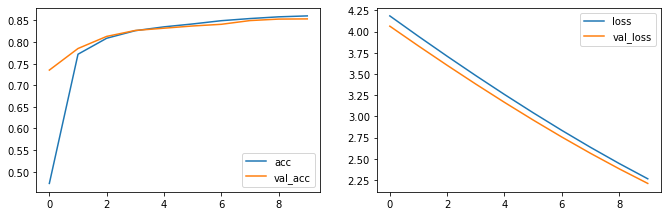

In [78]:
history_graph(history_vgg16_augmentation)

In [79]:
predictions = new_vgg_model_augmentation.predict(test_dataset_vgg16)

In [80]:
class_pred = np.argmax(predictions, axis=1)

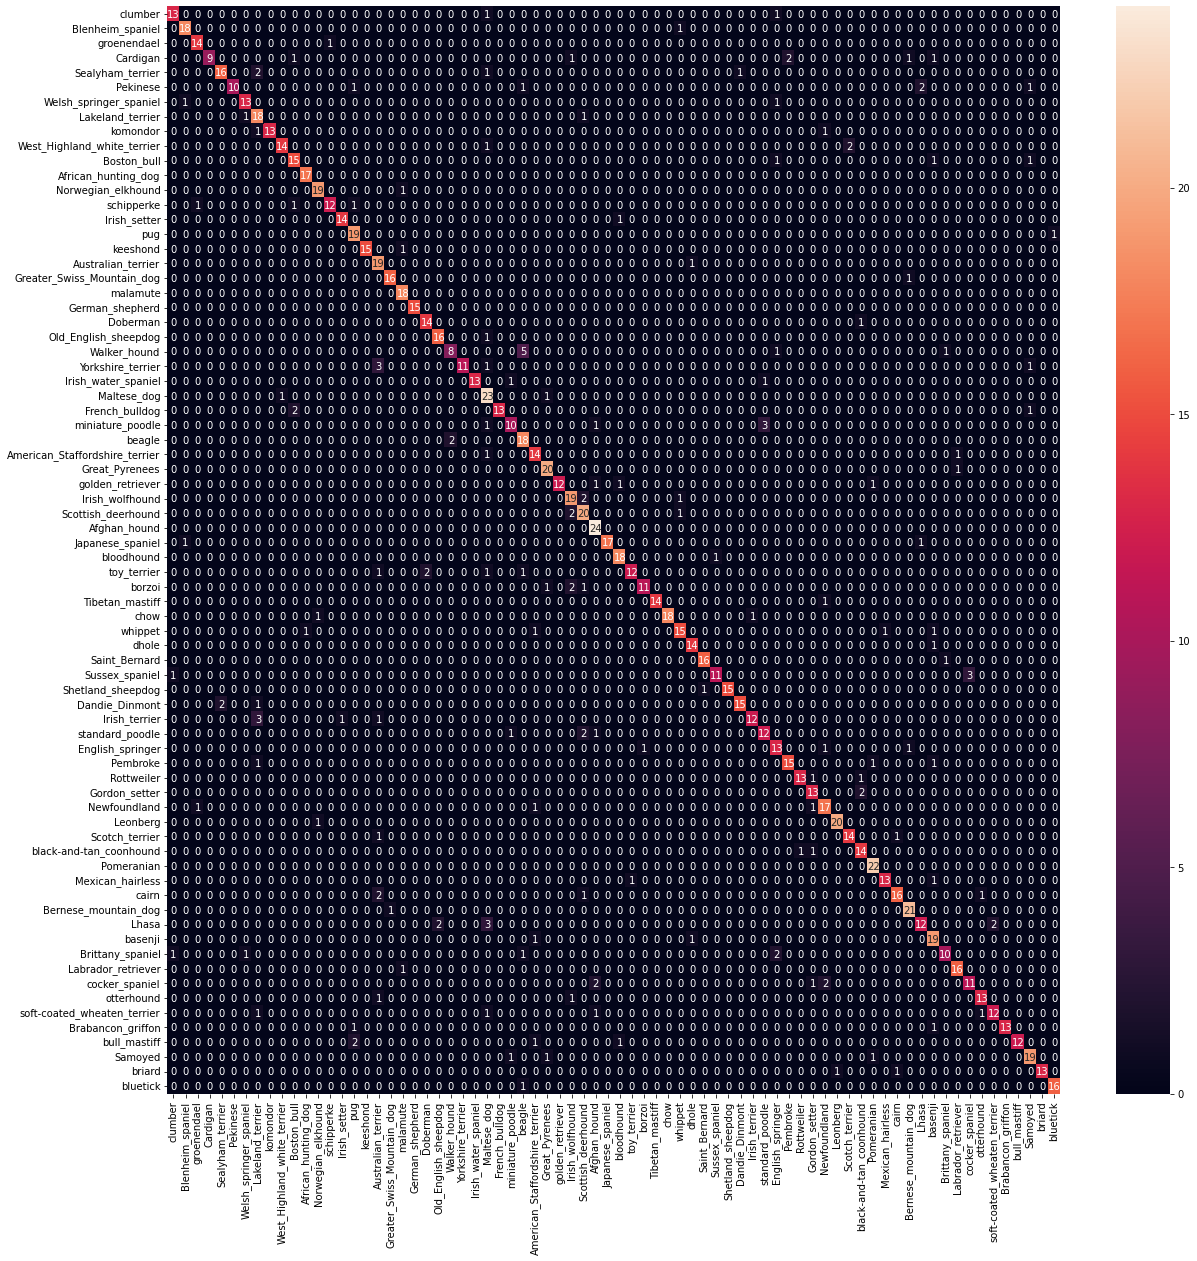

In [81]:
conf_matrix(y_test, class_pred)

La respuesta a la pregunta planteada **se responderá en el punto 7**.

---

<a id="section7"></a>
## <font color="#004D7F"> 7. Resultados y conclusiones </font>

<br>

En este apartado el objetivo es evaluar y sacar conclusiones de los resultados obtenidos en los apartados anteriores. Se deberán realizar los siguientes puntos:

  *  Comparativa de resultados entre las disintas redes o técnicas utilizadas.
  *  Comparativa de qué clases se obtienen mejores y peores resultados.
  *  Justificación de los modelos o técnicas seleccionadas.
  
 

##**RESULTADOS**

Por un lado, en el punto 3 hemos creado un modelo desde cero. Lo primero de todo ha sido reducir el tamaño del dataset original para sobreajustar. Tras ver que efectivamente estaba bien definido, hemos creado la arquitectura de la red siguiendo la estructura mencionada. Como podemos observar en las dos tablas de arriba **no dan para nada un buen resultado**. **Mejora ligeramente** al añadirle los **hiperparámetros** (dos tablas de abajo), aunque ambas redes dejan unos valores de `acurracy` y `loss` **bastante alejados** de los entrenados no mejorando apenas.

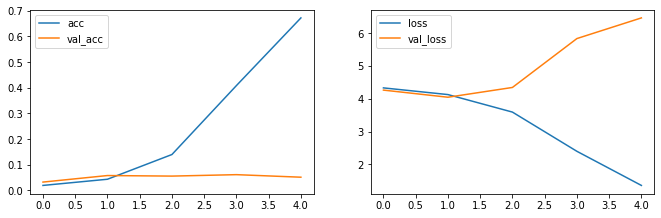

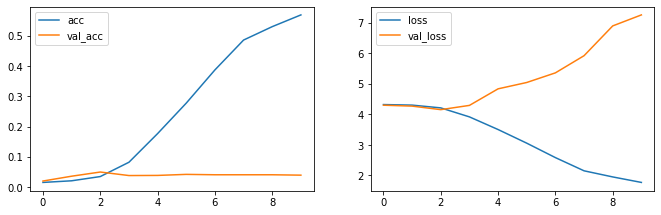

In [92]:
history_graph(history)
history_graph(history_hyperparameter)

Posteriormente, se ha trabajado con *Finetuning* a través de *Transfer Learning*. Concretamente, se ha realizado a través de **3 redes**:

### **MobileNet**

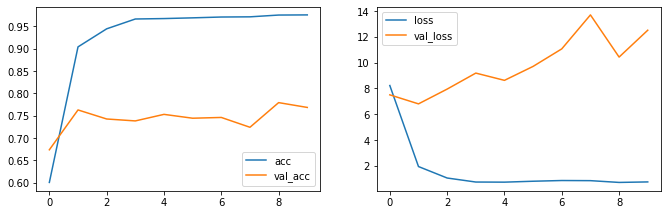

In [93]:
history_graph(history_mobilenet)

### **InceptionV3**

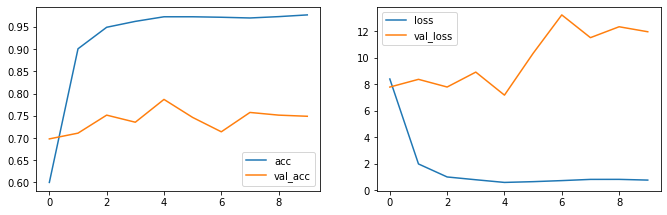

In [96]:
history_graph(history_inceptionv3)

### **VGG16**

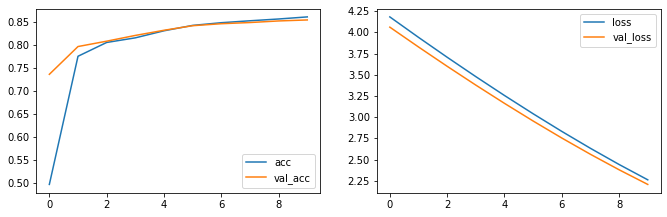

In [97]:
history_graph(history_vgg16)

Como es lógico dada su propia estructura de red (es una red optimizada a partir de Inception pensado en mayor medida para dispositivos más limitados) la **red 
MobileNet es la que peor resultado da de los 3**.

Resultados similares nos encontramos a partir de *InceptionV3*, siendo muy ligeramente mejor al anterior pero con unos valores que **no consiguen acercarse a los del entrenamiento** (aunque mejor si lo comparamos con la red creada desde cero, con o sin hiperparámetros).

Sin embargo, situación distinta nos encontramos con la red preentrenada de *VG16*. Es la que, con diferencia, **mejores resultados aporta** sin llegar al subajuste (un poco inicialmente en el `accuracy` pero se puede ver al final de la gráfica.

Por último, se pedía **emplear capas de *data augmentation*** con la finalidad de saber cómo afectaba a las redes establecidas previamente.

Para ello, decidí poner boca abajo las imágenes (girarlas verticalmente) y añadir una pequeña rotación cuyo rango fuera [-20% * 2pi, 30% * 2pi]. Podría haberlas volteado horizontalmente pero observando las imágenes parece estar en un 50% entre los dos tipos, por lo que me he decantado finalmente por la vertical.

Por un lado usé la primera red creada de todas con los hiperparámetros (tablas de arriba), y le añadí dichas capas de *data augmentation* (tablas de abajo). Veamos sí se ha observado mejoría:

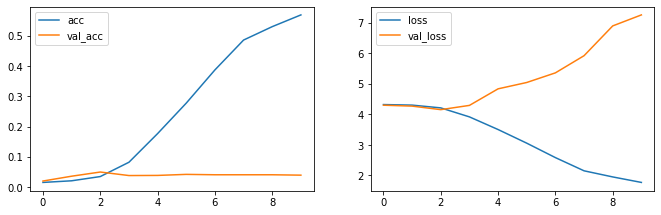

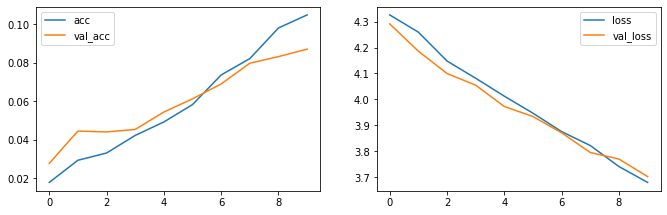

In [98]:
history_graph(history_hyperparameter)
history_graph(history_augmentation)

Realmente **es una mejora** respecto a la red sin emplear *data augmentation*. No se progresa en cuanto a valores, los cuales siguen siendo bajos, pero al menos ahora se adecuán a los del entrenamiento. Parece que en los valores de `loss` se puede observar que igual estamos antes un supuesto de subajuste pues los valores parecen ir superando a los del entrenamiento a medida que aumentamos los epochs.

Ahora observemos si hay mejora con la red inicial de VGG16 (arriba) y la modificada con *data augmentation* (abajo):

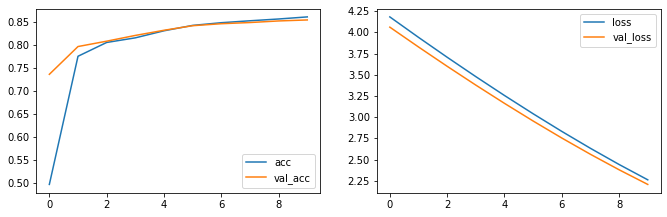

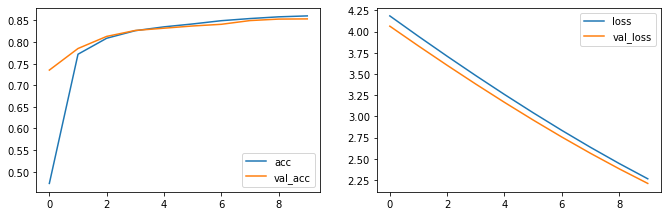

In [100]:
history_graph(history_vgg16)
history_graph(history_vgg16_augmentation)

En esta comparación prácticamente **no existe mejoría entre una red y otra**.

En parte tiene sentido pues son redes ya pre-entrenadas, con una estructura mucho mejor definida que la básica que hemos podido crear al inicio de este Proyecto de consolidación. No obstante, puede que igual girando las imágenes horizontalmente o añadiéndole algo de brillo hubiera mejorado en mayor medida los resultados (sería ir probando).

# **En conclusión**

Se ha demostrado que efectivamente a medida que mejoremos la red como norma general se van a ir opteniendo mejores resultados.

Digo como norma general por **dos ejemplos que justifican este razonamiento**:

- No por añadir más y más parámetros se van optener mejores resultados (como he querido demostrar en la pregunta opcional del punto 4 de manera intencionada).

- En modelos pre-entrenados las capas de *data augmentation* pueden llegar a dar una mejora casi nula como en el supuesto visto con VGG16.

Por supuesto hay que entender que afectan otros factores como el tamaño del bach o los epochs. Ya hemos visto como a partir del epoch 10 algunos modelos siguen aprendiendo, pero el conjunto de validación empieza a oscilar.

También se ha demostrado que, aunque podemos crear una estructura de red muy óptima por nuestra cuenta, los modelos pre-entrenados **nos ofrecen de manera rápida unos resultados más eficaces inicialmente**.

Dejar claro que porque en este Proyecto de Consolidación haya dado el que mejor resultado la red pre-entrenada de VGG16 (concretamente la modificada con *data augmentation*) no significa que **siempre** vaya a ser la que más nos interese.

Deberemos atender al problema que se nos plantee en primer lugar para buscar la mejor solución: tamaño de las imágenes, rápidez, rendimiento...